In [ ]:
import torch
import numpy
import matplotlib.pyplot as plt
import pickle
import numpy as np
from optimize import optimize
from structure import Structure

In [3]:
with open(f'../../steps/predicted_outputs/1z6mA02.out', 'rb') as f:
    d = pickle.load(f)

In [4]:
distogram = d['distogram']

In [6]:
x = torch.linspace(2, 22, 31)

In [5]:
distogram.shape

torch.Size([32, 61, 61])

In [27]:
def calc_moments(distribution):
    """
    Calculate mean and standard deviation of a distribution
    """
    x = torch.linspace(2, 22, 31)
    d_mean = torch.sum(x * distribution)
    d_var = torch.sum(x ** 2 * distribution) - d_mean ** 2
    
    return d_mean, torch.sqrt(d_var)

In [28]:
def normal_distr(x, mu, sigma):
    """
    Find probability of a value "x" in a normal distribution with mean
    "mu" and standard deviation "sigma"
    """
    
    return 1/(sigma * torch.sqrt(torch.tensor(2 * np.pi))) * torch.exp((-1/2) * ((x - mu) / sigma) ** 2) 

In [44]:
m, s = calc_moments(distogram[1:, 10, 2])

In [45]:
m, s

(tensor(13.5171), tensor(1.7328))

In [46]:
nd = [normal_distr(i, m, s) for i in x]

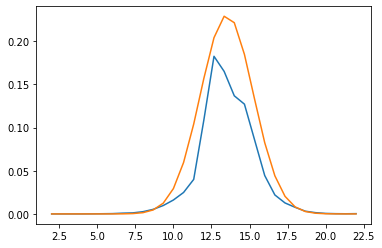

In [47]:
plt.plot(x, distogram[1:, 10, 2])
plt.plot(x, nd)

In [35]:
def fit_normal(distogram):
    """
    This just calculates means and standard deviation of all histograms
    and saves it into a 3D tensor with depth 2
    """
    L = distogram.shape[1]
    params = torch.empty((2, L, L))
    
    for i in range(L):
        for j in range(L):
            m, s = calc_moments(distogram[1:, i, j])
            params[0, i, j], params[1, i, j] = m, s 
    
    return params

In [36]:
n = fit_normal(distogram)

In [40]:
n[:, 10, 2]

tensor([13.5171,  1.7328])

In [2]:
d = optimize('1z6mA02', random_state = 3, iterations=200, lr=0.01, lr_decay=0.5,
         normal=True, angle_potential=False, initial_structure=True)

Iteration 000, Loss: 9047.686
Iteration 010, Loss: 8871.761
Iteration 020, Loss: 8599.487
Iteration 030, Loss: 8633.804
Iteration 040, Loss: 8457.893
Iteration 050, Loss: 9215.256
Iteration 060, Loss: 8613.968
Iteration 070, Loss: 7875.522
Iteration 080, Loss: 7576.863
Iteration 090, Loss: 7124.336
Iteration 100, Loss: 7131.384
Iteration 110, Loss: 7283.307
Iteration 120, Loss: 7160.783
Iteration 130, Loss: 7047.126
Iteration 140, Loss: 7007.196
Iteration 150, Loss: 7026.015
Iteration 160, Loss: 7061.613
Iteration 170, Loss: 7093.932
Iteration 180, Loss: 7185.938
Iteration 190, Loss: 7228.584
Iteration 199, Loss: 7350.653


In [8]:
d = optimize('1z6mA02', random_state = 3, iterations=200, lr=0.01, lr_decay=0.5, decay_frequency=50,
         normal=True, angle_potential=False, initial_structure=True)

Iteration 000, Loss: 9047.686
Iteration 010, Loss: 8699.699
Iteration 020, Loss: 8264.229
Iteration 030, Loss: 8088.971
Iteration 040, Loss: 8265.937
Iteration 050, Loss: 8369.272
Iteration 060, Loss: 8251.837
Iteration 070, Loss: 8022.103
Iteration 080, Loss: 7870.605
Iteration 090, Loss: 7751.258
Iteration 100, Loss: 7637.283
Iteration 110, Loss: 7570.836
Iteration 120, Loss: 7525.576
Iteration 130, Loss: 7504.810
Iteration 140, Loss: 7498.565
Iteration 150, Loss: 7518.891
Iteration 160, Loss: 7539.096
Iteration 170, Loss: 7557.040
Iteration 180, Loss: 7577.513
Iteration 190, Loss: 7601.013
Iteration 199, Loss: 7624.152


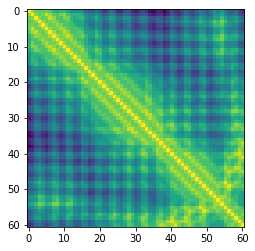

In [5]:
with torch.no_grad():
    di = d[1].G()
di += di.t()

plt.imshow(di, cmap='viridis_r')

In [10]:
d = optimize('1z6mA02', random_state = 3, iterations=200, lr=0.01, lr_decay=0.1,
         normal=True, verbose=10, angle_potential=False)

Iteration 000, Loss: 9047.675
Iteration 010, Loss: 8871.669
Iteration 020, Loss: 8596.553
Iteration 030, Loss: 8633.253
Iteration 040, Loss: 8471.446
Iteration 050, Loss: 9224.742
Iteration 060, Loss: 8624.594
Iteration 070, Loss: 7855.049
Iteration 080, Loss: 7621.947
Iteration 090, Loss: 7060.315
Iteration 100, Loss: 7031.509
Iteration 110, Loss: 7096.785
Iteration 120, Loss: 7116.693
Iteration 130, Loss: 7131.420
Iteration 140, Loss: 7136.074
Iteration 150, Loss: 7142.362
Iteration 160, Loss: 7148.857
Iteration 170, Loss: 7152.985
Iteration 180, Loss: 7132.137
Iteration 190, Loss: 7110.990
Iteration 199, Loss: 7077.683


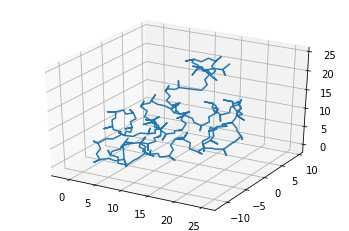

In [12]:
d[0].visualize_structure()

In [6]:
pdb = d[0].pdb_coords()

NameError: name 'd' is not defined

In [15]:
with torch.no_grad():
    dd = d[0].G()
    dd += dd.t()

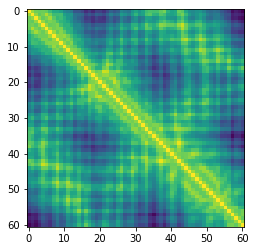

In [18]:
plt.imshow(dd, cmap='viridis_r')

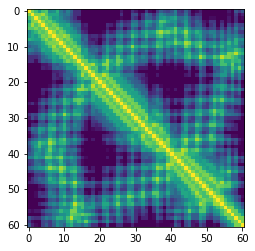

In [19]:
dm = torch.load(f'../../data/our_input/distance_maps/distance_maps32/1z6mA02.pt')
plt.imshow(dm, cmap='viridis_r')

In [4]:
s = Structure('1z6mA02', normal=True, angle_potential=False, random_state=3)

In [5]:
s.optimize(20, lr=0.001, max_iter=40)

Iteration: 000, Loss: 9047.675
61.22692608833313
Iteration: 001, Loss: 8634.055
61.01611328125
Iteration: 002, Loss: 8120.939
60.912036180496216
Iteration: 003, Loss: 8342.768
61.03284502029419
Iteration: 004, Loss: 8594.784
60.582706928253174
Iteration: 005, Loss: 8710.704
60.6521110534668
Iteration: 006, Loss: 8425.884
60.77888607978821
Iteration: 007, Loss: 8393.063


KeyboardInterrupt: 

# Hyperparameter choice

1. No learning rate decay

In [7]:
params = []
for l in [0.01, 0.005, 0.001, 0.0005, 0.0001]:
    for m in [0, 0.1, 0.5, 0.9]:
        params.append((l, m))

In [12]:
optimized = {}
for p in params:
    s = optimize('1z6mA02', random_state=1, iterations=200, lr=p[0], momentum=p[1], normal=True, angle_potential=False)
    optimized[f'{p}'] = s

Iteration 000, Loss: 11356.329
Iteration 010, Loss: 10577.455
Iteration 020, Loss: 10029.805
Iteration 030, Loss: 9518.087
Iteration 040, Loss: 8507.307
Iteration 050, Loss: 8108.571
Iteration 060, Loss: 7909.475
Iteration 070, Loss: 7753.394
Iteration 080, Loss: 7595.910
Iteration 090, Loss: 7549.522
Iteration 100, Loss: 7546.869
Iteration 110, Loss: 7543.366
Iteration 120, Loss: 7601.182
Iteration 130, Loss: 7790.372
Iteration 140, Loss: 7496.175
Iteration 150, Loss: 7743.953
Iteration 160, Loss: 7797.872
Iteration 170, Loss: 8058.559
Iteration 180, Loss: 8207.092
Iteration 190, Loss: 8232.520
Iteration 199, Loss: 8065.579
Iteration 000, Loss: 11356.329
Iteration 010, Loss: 10470.362
Iteration 020, Loss: 10016.399
Iteration 030, Loss: 9232.846
Iteration 040, Loss: 8282.536
Iteration 050, Loss: 7949.356
Iteration 060, Loss: 7804.283
Iteration 070, Loss: 7569.187
Iteration 080, Loss: 7593.616
Iteration 090, Loss: 7600.271
Iteration 100, Loss: 7639.364
Iteration 110, Loss: 7737.492
Iter

In [13]:
with open('1z6mA02_trials/1z6m_smooth.pkl', 'wb') as f:
    pickle.dump(optimized, f)

In [14]:
optimized.keys()

dict_keys(['(0.01, 0)', '(0.01, 0.1)', '(0.01, 0.5)', '(0.01, 0.9)', '(0.005, 0)', '(0.005, 0.1)', '(0.005, 0.5)', '(0.005, 0.9)', '(0.001, 0)', '(0.001, 0.1)', '(0.001, 0.5)', '(0.001, 0.9)', '(0.0005, 0)', '(0.0005, 0.1)', '(0.0005, 0.5)', '(0.0005, 0.9)', '(0.0001, 0)', '(0.0001, 0.1)', '(0.0001, 0.5)', '(0.0001, 0.9)'])

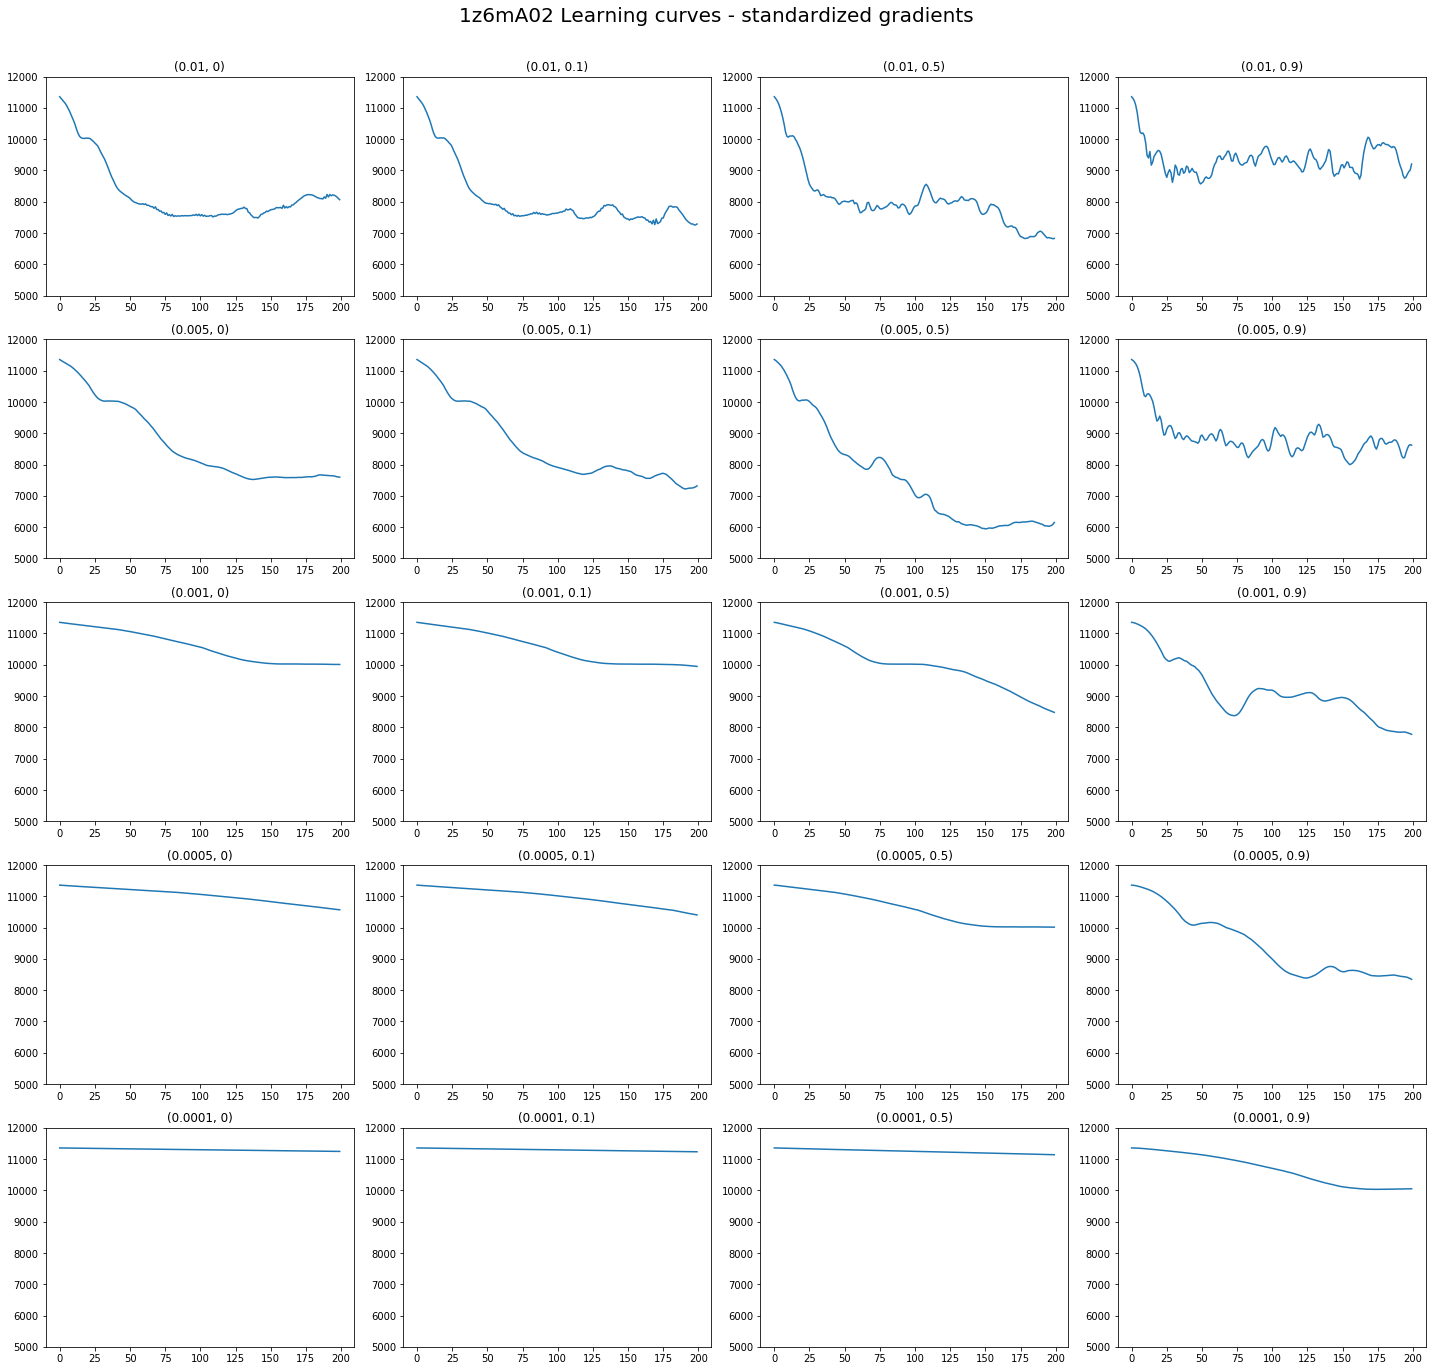

In [33]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))

for i in range(5):
    for j in range(4):
        ind = i * 4 + j
        k = list(optimized.keys())[ind]
        ax[i, j].plot(optimized[k][2][:, 0], optimized[k][2][:, 1])
        ax[i, j].set_ylim(5000, 12000)
        ax[i, j].set_title(k)

fig.suptitle('1z6mA02 Learning curves - standardized gradients', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../../plots/structure_realization/1z6m_lrcrvs_standardized.png')


In [19]:
sb = optimized['(0.005, 0.5)']

In [23]:
with torch.no_grad():
    dm = sb[0].G()

dm += dm.t()

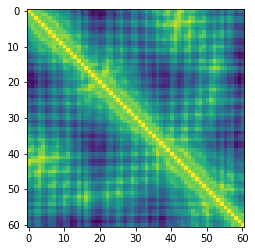

In [25]:
plt.imshow(dm, cmap='viridis_r')

In [27]:
sb[0].pdb_coords(output_dir='1z6mA02_trials/')

# Scaling of gradients between -1 and 1

In [28]:
optimized2 = {}
for p in params:
    s = optimize('1z6mA02', random_state=1, iterations=200, lr=p[0], 
                 momentum=p[1], normal=True, angle_potential=False, normalize_gradients=False,
                scale_gradients=True)
    optimized2[f'{p}'] = s

Iteration 000, Loss: 11356.329
Iteration 010, Loss: 11059.913
Iteration 020, Loss: 10592.908
Iteration 030, Loss: 9826.861
Iteration 040, Loss: 9547.249
Iteration 050, Loss: 9320.945
Iteration 060, Loss: 8920.051
Iteration 070, Loss: 8357.954
Iteration 080, Loss: 8277.599
Iteration 090, Loss: 8409.905
Iteration 100, Loss: 8477.464
Iteration 110, Loss: 8479.394
Iteration 120, Loss: 8432.771
Iteration 130, Loss: 8368.488
Iteration 140, Loss: 8326.357
Iteration 150, Loss: 8358.259
Iteration 160, Loss: 8409.510
Iteration 170, Loss: 8462.408
Iteration 180, Loss: 8462.265
Iteration 190, Loss: 8411.688
Iteration 199, Loss: 8315.165
Iteration 000, Loss: 11356.329
Iteration 010, Loss: 11022.051
Iteration 020, Loss: 10452.726
Iteration 030, Loss: 9682.854
Iteration 040, Loss: 9453.409
Iteration 050, Loss: 9067.399
Iteration 060, Loss: 8560.080
Iteration 070, Loss: 8258.395
Iteration 080, Loss: 8391.714
Iteration 090, Loss: 8481.634
Iteration 100, Loss: 8484.364
Iteration 110, Loss: 8427.710
Iter

In [35]:
with open('1z6mA02_trials/1z6m_smooth_scaled.pkl', 'wb') as f:
    pickle.dump(optimized2, f)

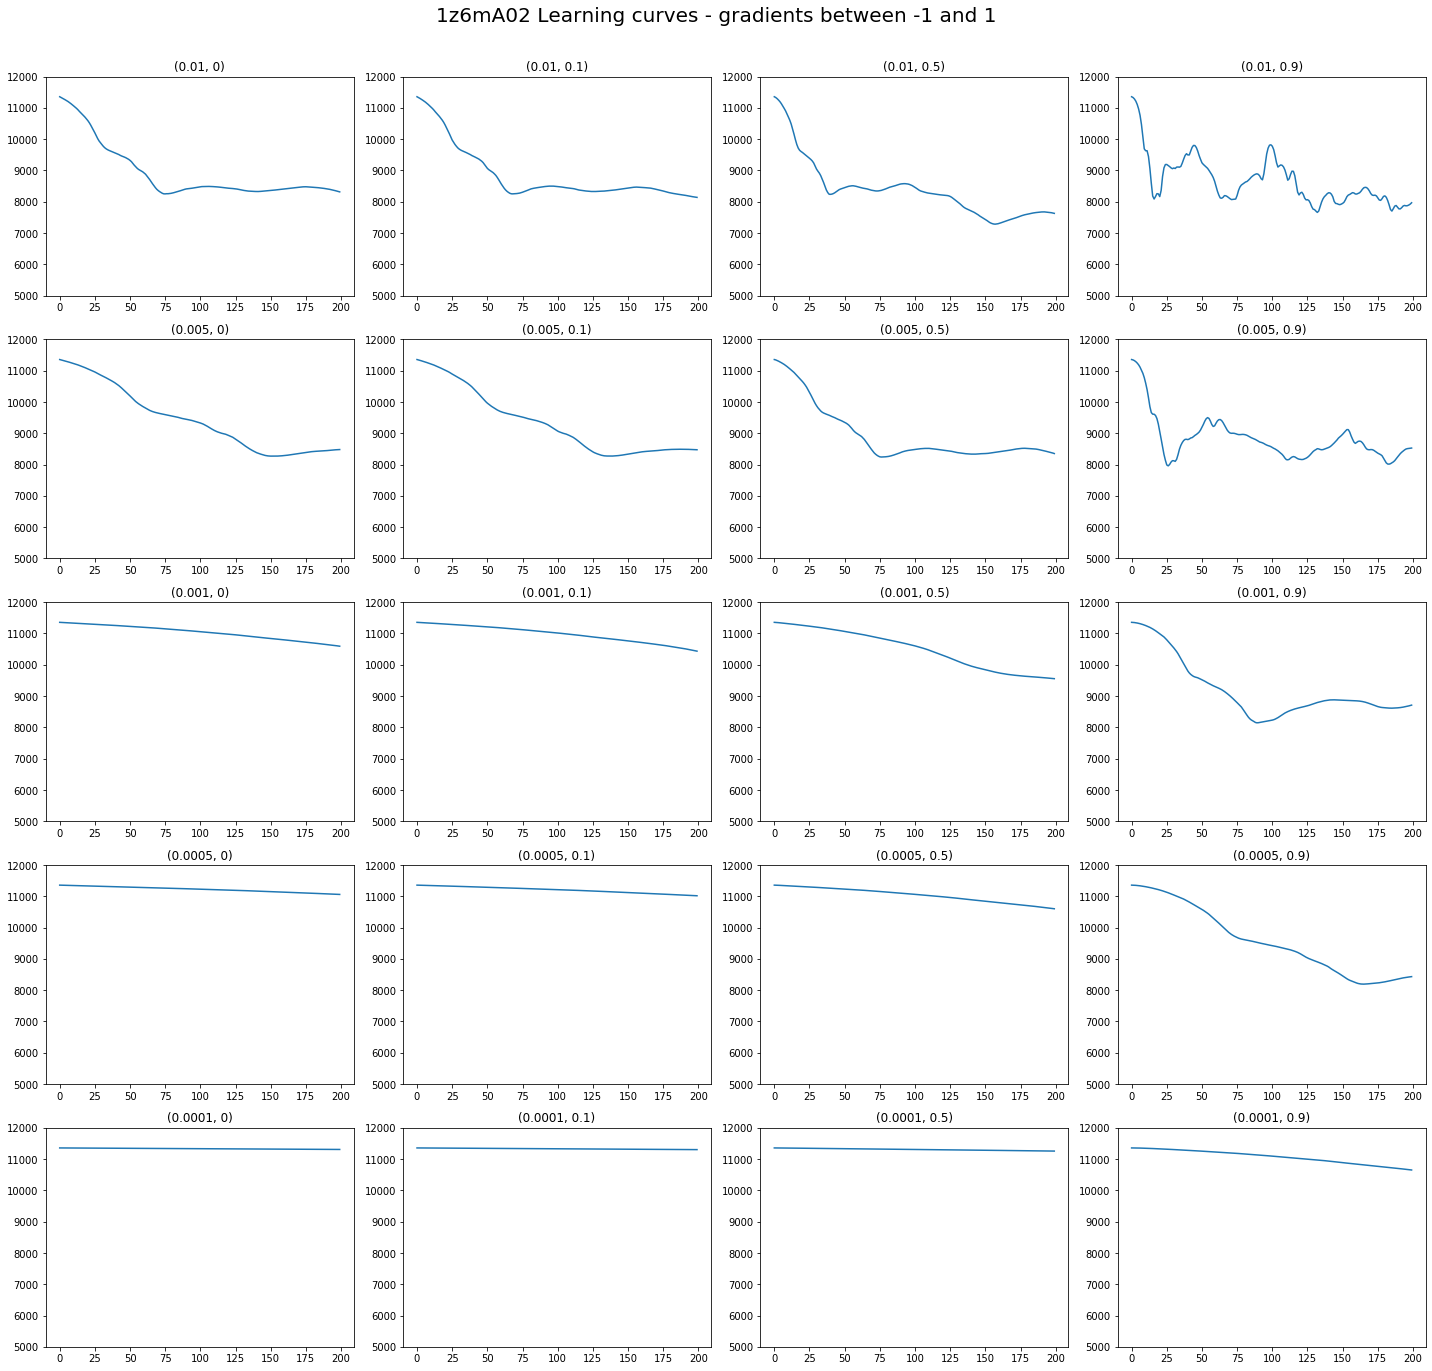

In [34]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))

for i in range(5):
    for j in range(4):
        ind = i * 4 + j
        k = list(optimized2.keys())[ind]
        ax[i, j].plot(optimized2[k][2][:, 0], optimized2[k][2][:, 1])
        ax[i, j].set_ylim(5000, 12000)
        ax[i, j].set_title(k)

fig.suptitle('1z6mA02 Learning curves - gradients between -1 and 1', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../../plots/structure_realization/1z6m_lrcrvs_scaled.png')

---

In [2]:
import pickle

In [3]:
with open('1z6mA02_trials/1z6m_smooth_standnorm.pkl', 'rb') as f:
    s = pickle.load(f)

In [4]:
sb = s['(0.005, 0.5)']

In [5]:
sb[0].pdb_coords(output_dir='trials/')

In [6]:
from Bio.PDB import PDBParser

In [8]:
st = PDBParser().get_structure('', 'trials/1z6mA02_pred.pdb')

IndexError: list index out of range